In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data = pd.read_csv('Advertising.csv')

In [93]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [94]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [95]:
data.shape

(200, 4)

<Axes: xlabel='newspaper', ylabel='sales'>

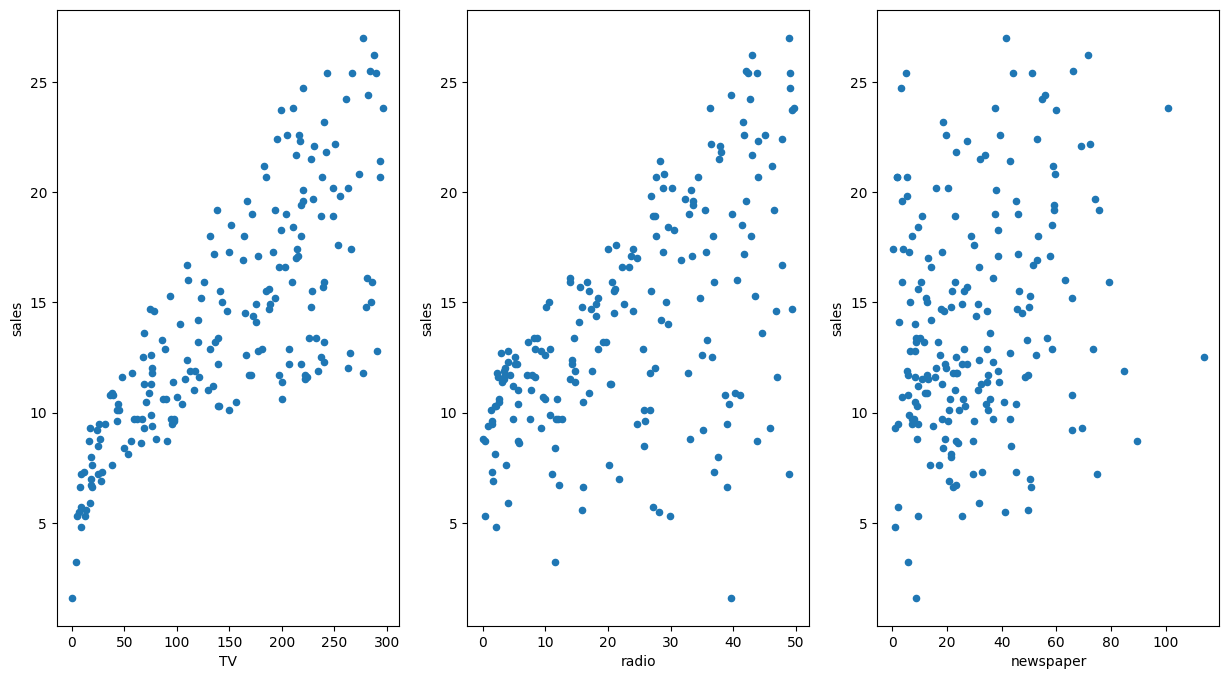

In [96]:
fig,axs = plt.subplots(1,3)
data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (15,8))
data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

<Axes: xlabel='newspaper', ylabel='sales'>

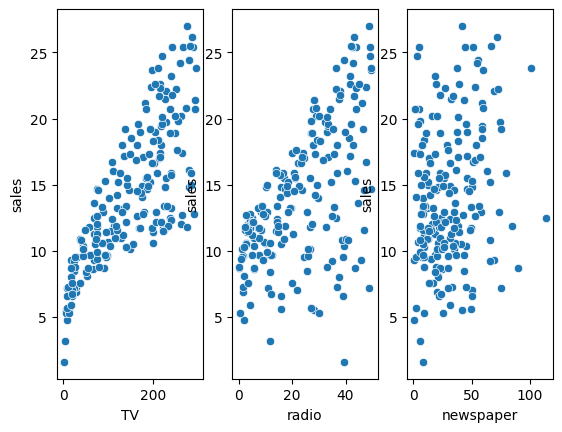

In [97]:
plt.subplot(1,3,1)
sns.scatterplot(x=data['TV'], y=data['sales'])
plt.subplot(1,3,2)
sns.scatterplot(x=data['radio'], y=data['sales'])
plt.subplot(1,3,3)
sns.scatterplot(x=data['newspaper'], y=data['sales'])

In [98]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

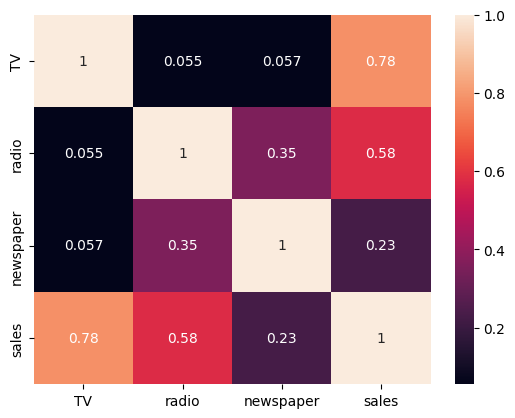

In [99]:
sns.heatmap(data.corr(), annot=True)

# Linear Regression

In [100]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.sales

In [101]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [102]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 100,test_size=0.2)

In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
first_model = LinearRegression()

In [108]:
first_model.fit(X_train, y_train)

LinearRegression()

In [109]:
first_model.coef_

array([0.04610976])

In [110]:
first_model.intercept_

np.float64(7.113008222196275)

Interpreting the coefficients
1.A unit increase in TV ad spending was associated with a .048 unit increase in Sales

Inference
y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on TV is $50,000. I want you to tell me the sales generated due to this spend

In [111]:
0.046*50 + 7.11

9.41

In [112]:
0.046*7.8 + 7.11

7.4688

In [113]:
Pred = first_model.predict(X_test)

In [114]:
Pred

array([ 7.47266432, 18.09635222, 13.3470473 , 17.15110221, 18.25773636,
       16.64850586, 13.53148632, 16.2242961 , 17.09115952, 17.10960343,
       12.51707168, 17.69519733,  9.70437654, 15.77242049, 11.13377899,
       11.45654728, 14.01563877, 14.96088877, 14.65195341, 12.31879973,
       17.01277294, 13.07961071, 16.12285464, 15.27443512, 15.6387022 ,
       17.27098757, 17.2479327 , 10.58507289, 15.6387022 , 12.78911924,
       10.26691557, 10.29458142, 12.69228876, 15.80008634,  9.41849605,
       12.66923388, 11.59487655, 14.87789121, 17.36781806, 16.02141317])

In [115]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
Name: sales, dtype: float64

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Evaluation on Train Data

In [117]:
my_linear_preds_train = first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train)) 
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train)) 
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', first_model.score(X_train, y_train))


MAE on Train Data : 2.5730879118548264
MSE on Train Data : 10.75864378390027
RMSE on Train Data : 3.2800371619693993
R-squared on Train Data : 0.6197569503198974


# Evaluation on Test Data

In [118]:
my_model_preds = first_model.predict(X_test)
print('MAE on Test Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Test Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Test Data :', first_model.score(X_test, y_test))

MAE on Test Data : 2.4983195821565407
MSE on Test Data : 9.687069547890871
RMSE on Test Data : 3.1124057492381794
R-squared on Test Data : 0.5441581483697225


# Multiple Linear Regression

In [119]:
feature_cols = ['TV' , 'radio' , 'newspaper']
x = data[feature_cols]
y = data.sales

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10,test_size=0.2)

In [121]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [122]:
multiple_linear_model = LinearRegression()

In [123]:
multiple_linear_model.fit(X_train, y_train)

LinearRegression()

In [124]:
multiple_linear_model.coef_

array([ 0.0437726 ,  0.19343299, -0.00222879])

In [125]:
multiple_linear_model.intercept_

np.float64(3.2540971144188813)

In [126]:
pred = multiple_linear_model.predict(X_test)

In [127]:
pred

array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [128]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: sales, dtype: float64

# Evaluate on Train Data

In [129]:
multiple_linear_model_preds_train = multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(multiple_linear_model_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(multiple_linear_model_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(multiple_linear_model_preds_train,y_train)))
print('R-squared on Train Data :', multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.0661435033472688
MSE on Train Data : 1.8585966709492496
RMSE on Train Data : 1.3633035872281896
R-squared on Train Data : 0.9209087553499528


# Evaluate on Test Data

In [130]:
my_linear_preds_train = multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.0661435033472688
MSE on Train Data : 1.8585966709492496
RMSE on Train Data : 1.3633035872281896
R-squared on Train Data : 0.9209087553499528


In [131]:
data1 = pd.read_csv('New_data.csv')

In [132]:
data1

,TV,radio,newspaper
0,300,50,80


In [133]:
multiple_LR_predict = multiple_linear_model.predict(data1)

In [134]:
multiple_LR_predict

array([25.87922391])